<a href="https://colab.research.google.com/github/tasanyphy01773/ClimateScience/blob/main/starting/all_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy

!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely

In [1]:
!pip install cartopy

     |████████████████████████████████| 10.8 MB 4.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 13.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 14.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 219 kB 55.9 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516265 sha256=84ef37f6179834f5d3232d1bc362be8b76228046caee748c7d36a3bd71b7bd6d
  Stored in directory: /root/.cache/pip/wheels/98/01/f7/bd10aeb96fe4b518cde5f7c4f5e12c7202f85b7353a5017847
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37325 sha256=2df2630b9687df49235b02b3825484c6b2848a0b7fdcb460ebe6a757bd3929ca
  Stored in directory: /root/.cach

In [2]:
#writing some conda package or module
!pip install cartopy
%matplotlib inline
import warnings

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [3]:
#PC loc
# path = '/media/tasanyphy/Documents/Project or Research work/Climate Change/climate_physics[omi_tuaha]/Tanvir_sir_data/all_data/'
# file = 'APHRO_MA_025deg_V1101.PRE.1951.nc'

# Drive loc
path = '/content/drive/MyDrive/Climate Science Bangladesh /Climate_physics/Data/Tanvir_sir_data/all_data/'
file = 'APHRO_MA_025deg_V1101.PRE.1951.nc'

ds = xr.open_dataset(path+file)
ds

<xarray.Dataset>
Dimensions:    (latitude: 280, longitude: 360, time: 365)
Coordinates:
  * time       (time) datetime64[ns] 1951-01-01 1951-01-02 ... 1951-12-31
  * longitude  (longitude) float64 60.12 60.38 60.62 60.88 ... 149.4 149.6 149.9
  * latitude   (latitude) float64 -14.88 -14.62 -14.38 ... 54.38 54.62 54.88
Data variables:
    precip     (time, latitude, longitude) float32 ...
    rstn       (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  COARDS
    calendar:     standard
    comments:     APHRO_MA V1101 daily precipitation with 0.25deg grids
    history:      Created by APHRODITE project team 05-Apr-2011

In [6]:
ds['precip']

<xarray.DataArray 'precip' (time: 365, latitude: 280, longitude: 360)>
[36792000 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1951-01-01 1951-01-02 ... 1951-12-31
  * longitude  (longitude) float64 60.12 60.38 60.62 60.88 ... 149.4 149.6 149.9
  * latitude   (latitude) float64 -14.88 -14.62 -14.38 ... 54.38 54.62 54.88
Attributes:
    long_name:          daily precipitation analysis interpolated onto 0.25de...
    units:              mm/day
    level_description:  Earth surface

In [4]:
lon = ds['longitude'][:]
lat = ds['latitude'][:] 
time = ds['time'][:]

In [5]:
lon2d, lat2d = np.meshgrid(lon, lat)

In [6]:
ds_mean=ds.mean(dim='time')
ds_mean['precip']

<xarray.DataArray 'precip' (latitude: 280, longitude: 360)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.7966445 , 0.77527624, 0.7654599 , ...,        nan,        nan,
               nan],
       [0.8289502 , 0.7720198 , 0.78484654, ...,        nan,        nan,
               nan],
       [0.91175485, 0.8533194 , 0.84190935, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 60.12 60.38 60.62 60.88 ... 149.4 149.6 149.9
  * latitude   (latitude) float64 -14.88 -14.62 -14.38 ... 54.38 54.62 54.88

In [ ]:
# !pip install geos

/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_lakes.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: 

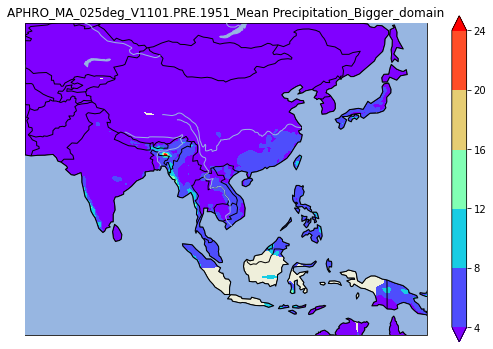

In [7]:
# precip = ds.precip.sel(time='2000-01-01', method='nearest')

fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.PlateCarree())
# plt.contourf(lon2d, lat2d, ds_mean['precip'], cmap='rainbow', extend='both', transform = ccrs.PlateCarree(),
#              cbar_kwargs={'shrink': 0.4})
plt.contourf(lon2d, lat2d, ds_mean['precip'], cmap='rainbow', extend='both', transform = ccrs.PlateCarree())


ax.coastlines()
ax.add_feature(cf.BORDERS)
ax.add_feature(cf.OCEAN, zorder=100, edgecolor='k')
ax.add_feature(cf.LAKES)
ax.add_feature(cf.LAND)
ax.add_feature(cf.RIVERS, zorder=100)

plt.title('APHRO_MA_025deg_V1101.PRE.1951_Mean Precipitation_Bigger_domain')
plt.colorbar()

# ax.set_global()


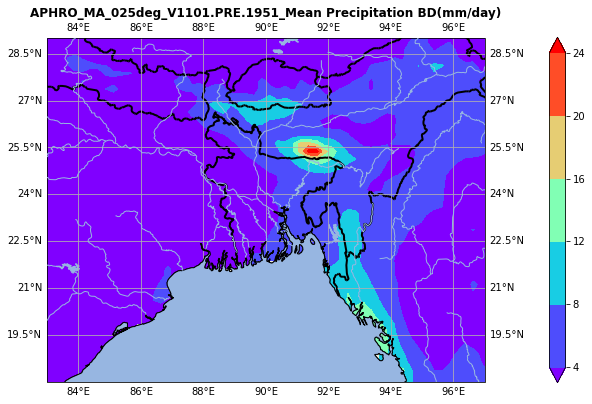

In [25]:
#BANGLADESH Domain
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(lon2d, lat2d, ds_mean['precip'], cmap='rainbow', extend='both', transform = ccrs.PlateCarree())

ax.coastlines()
ax.add_feature(cf.BORDERS, linewidth=2)
ax.add_feature(cf.OCEAN, zorder=100, edgecolor='k')
ax.add_feature(cf.LAKES)
ax.add_feature(cf.LAND)
ax.add_feature(cf.RIVERS, zorder=100)

plt.title('APHRO_MA_025deg_V1101.PRE.1951_Mean Precipitation BD(mm/day)', 
          fontweight="bold")

ax.set_extent([83, 97, 18, 29]) 
ax.gridlines(draw_labels=True)


#colorbar_setting
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.9, 0.1, 0.025, 0.8]) #plt.axes([x_position,y_position,width,height])
plt.colorbar(cax=cax)
# plt.savefig('/content/drive/MyDrive/Climate Science Bangladesh /Climate_physics/Coding/Sany/test.png')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

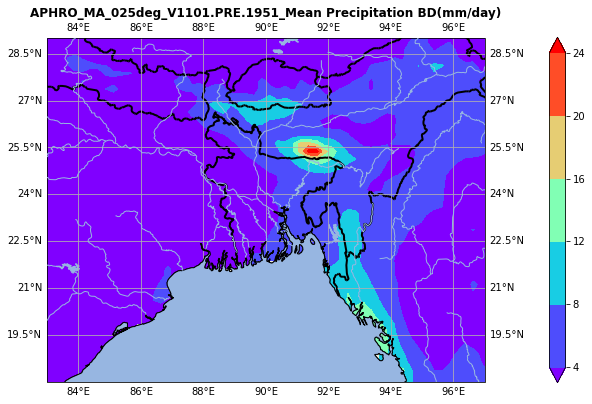

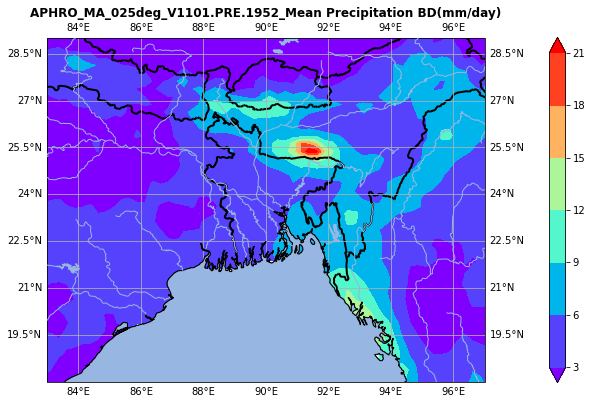

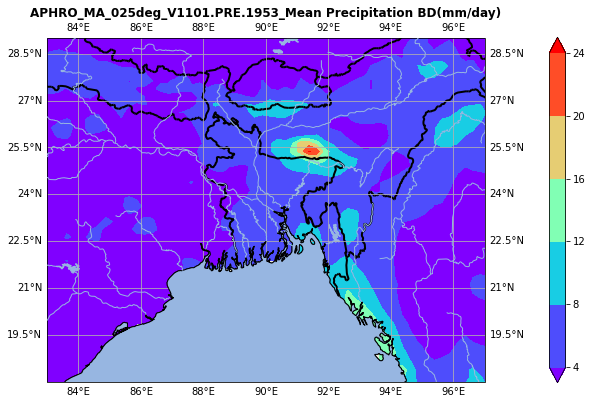

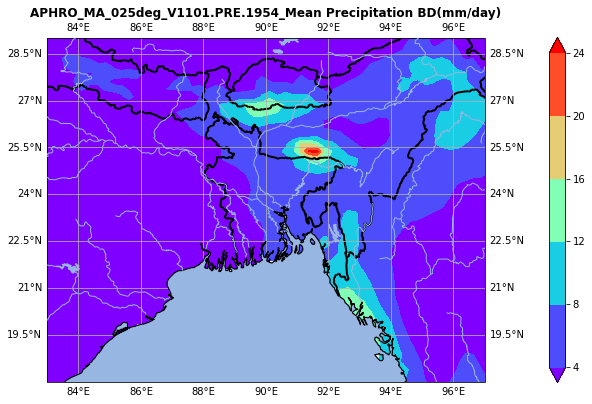

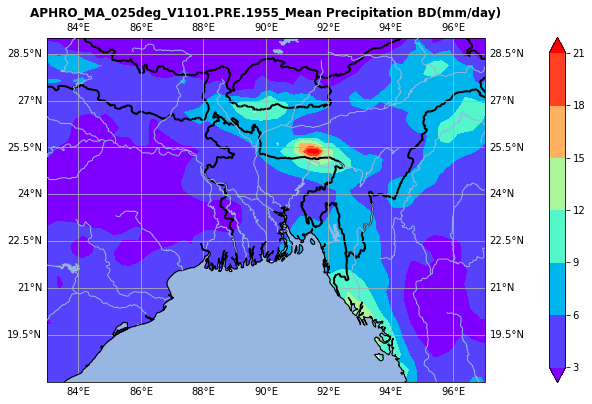

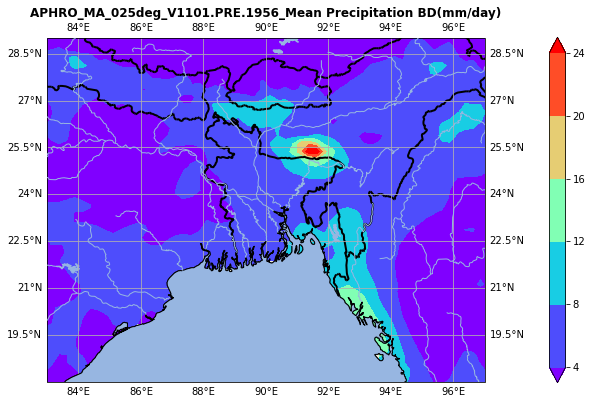

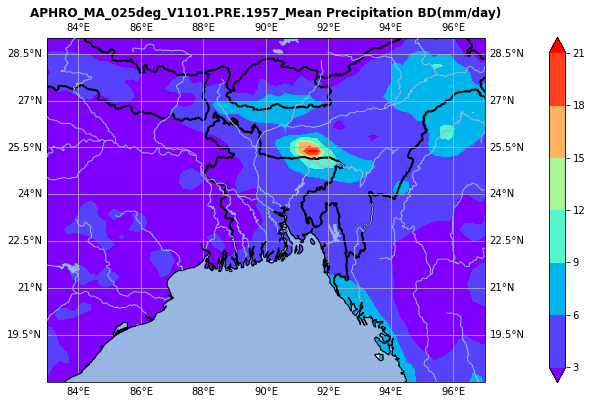

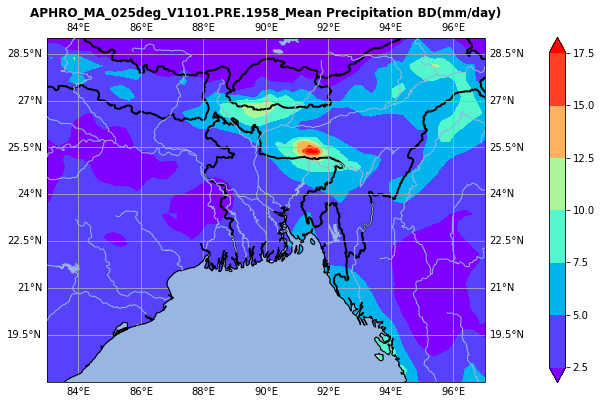

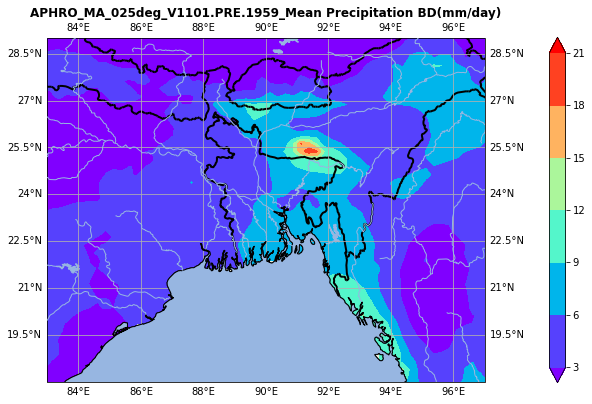

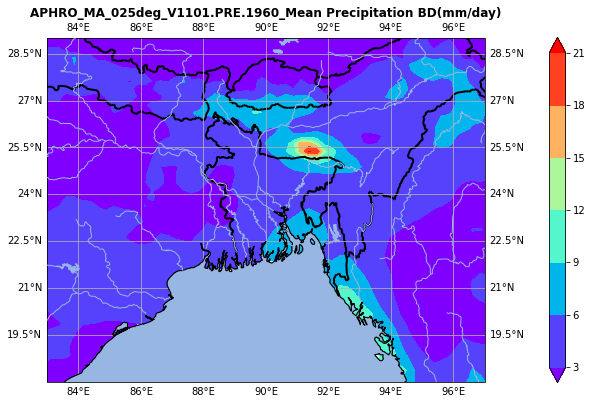

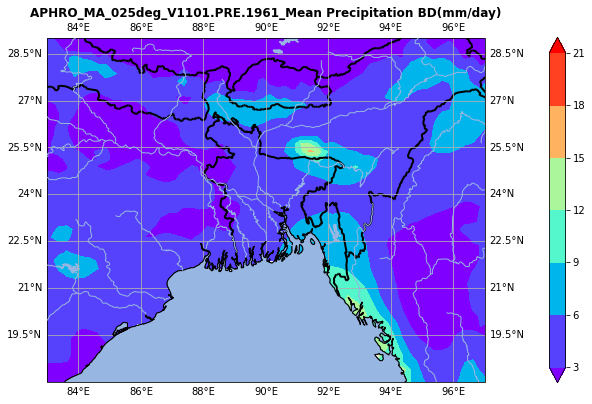

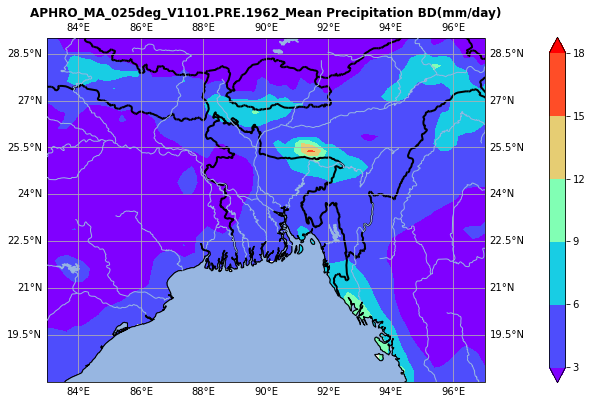

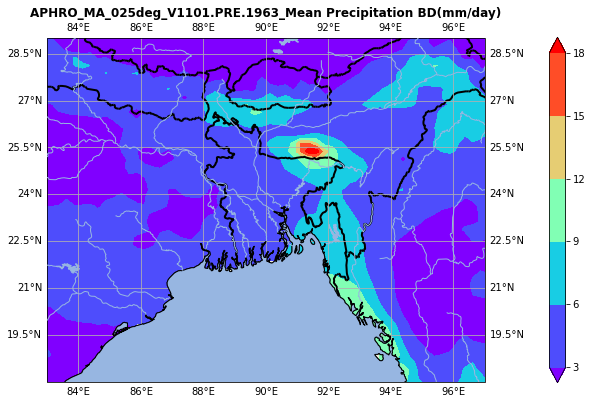

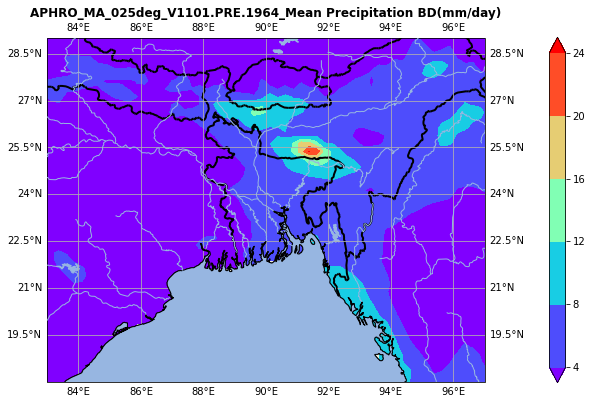

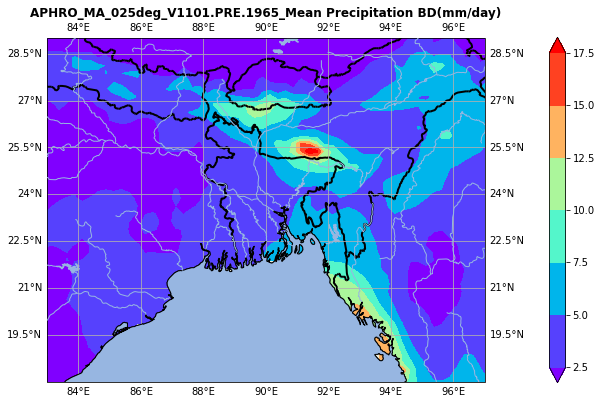

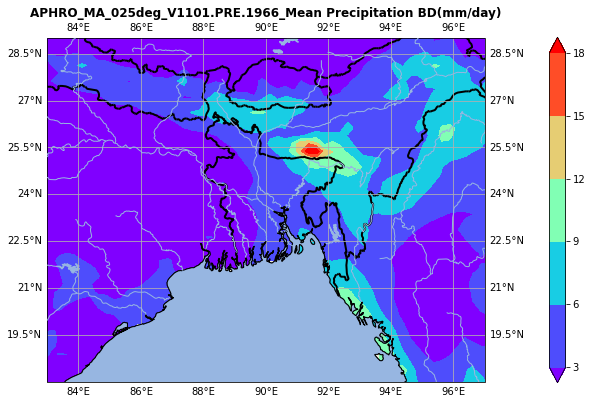

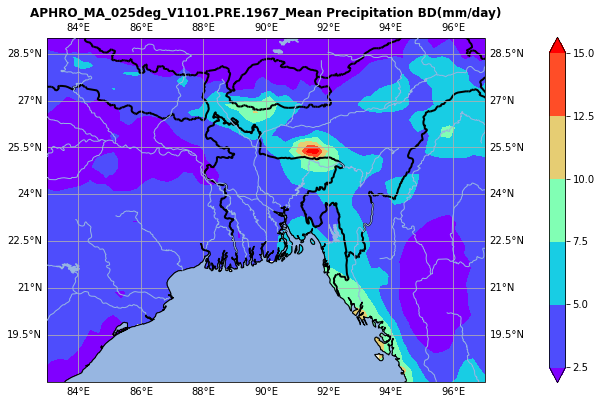

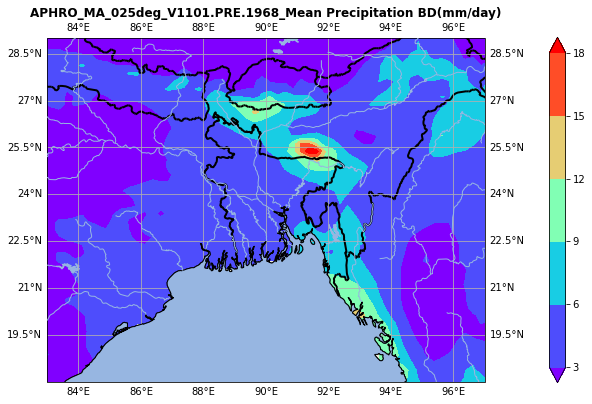

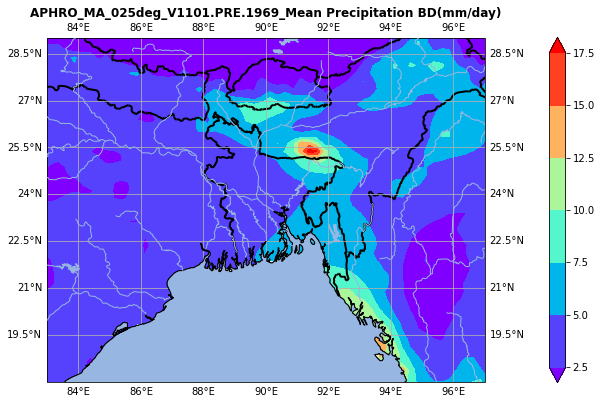

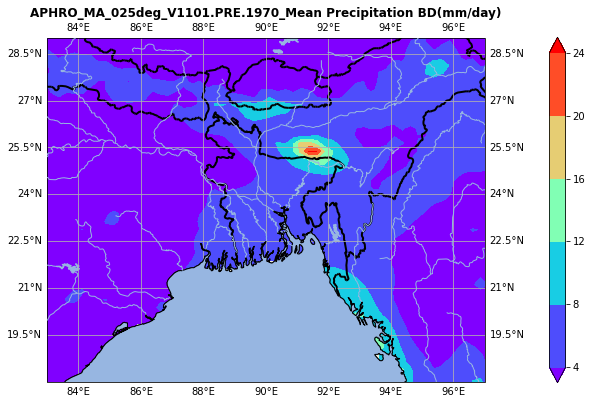

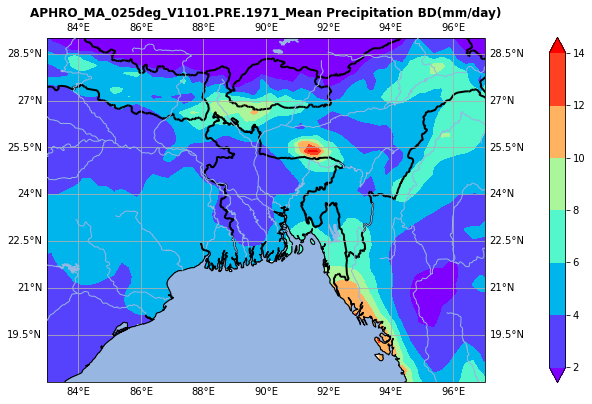

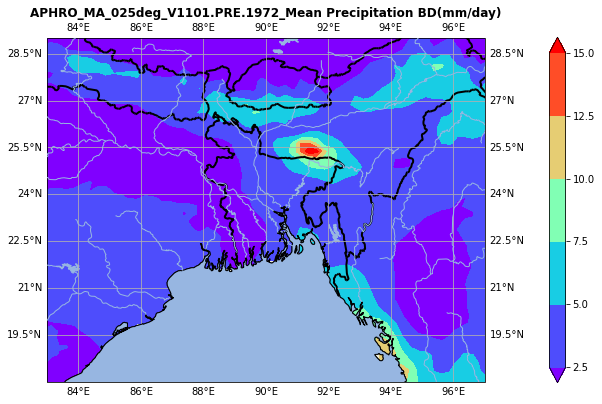

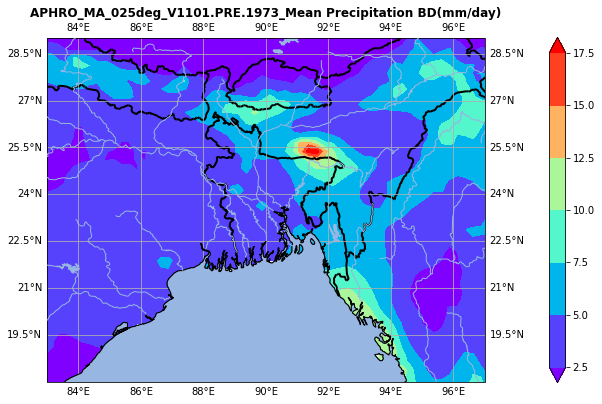

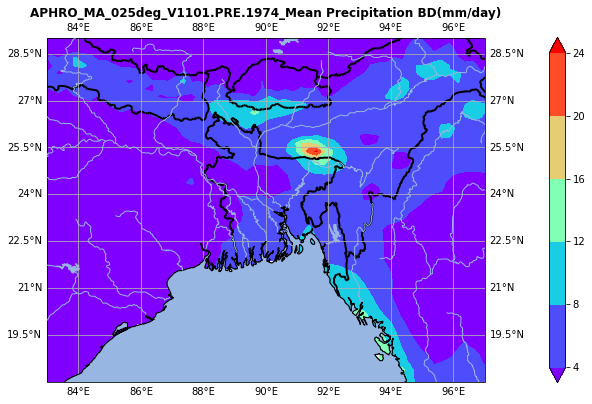

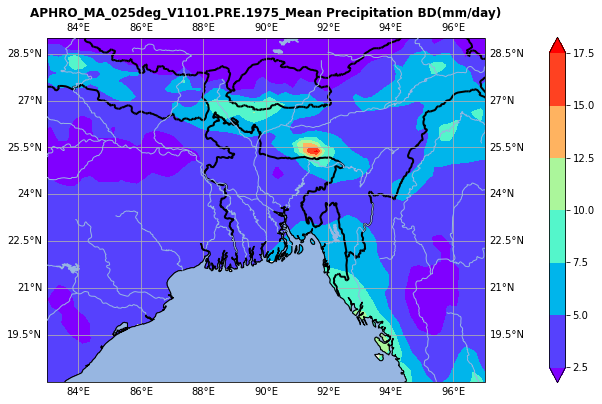

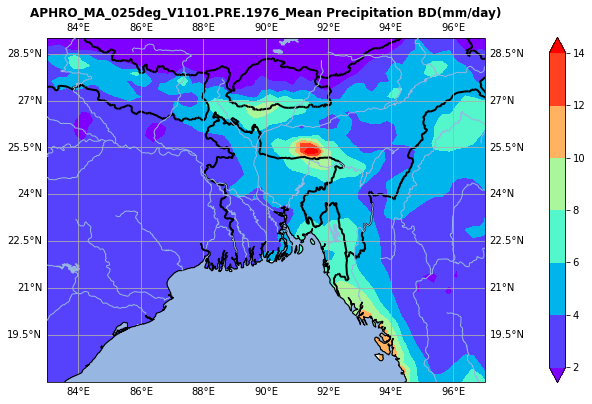

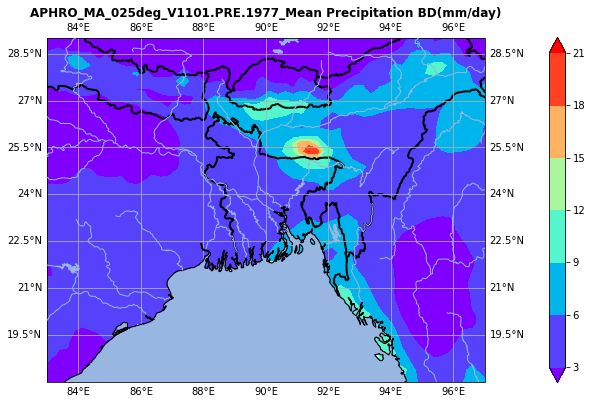

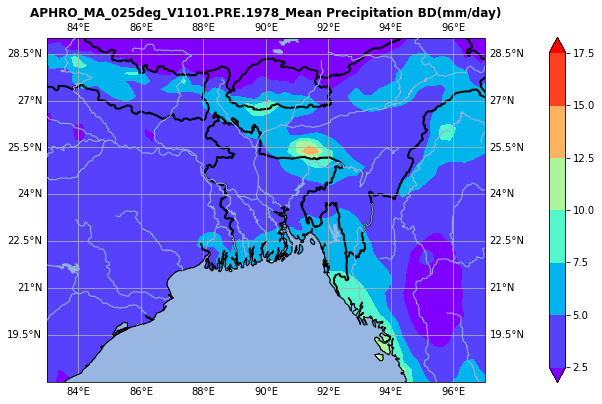

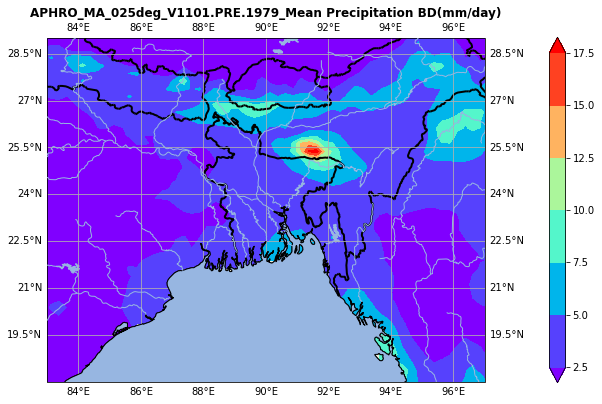

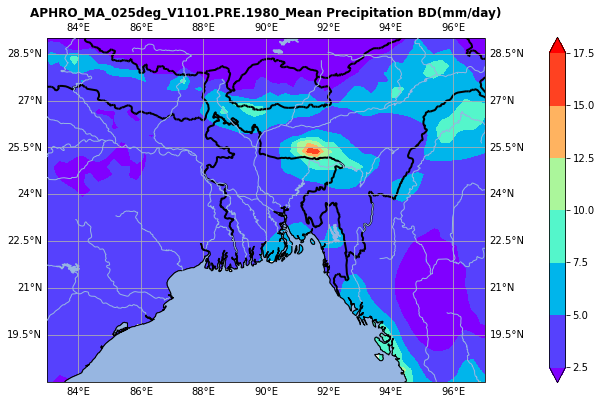

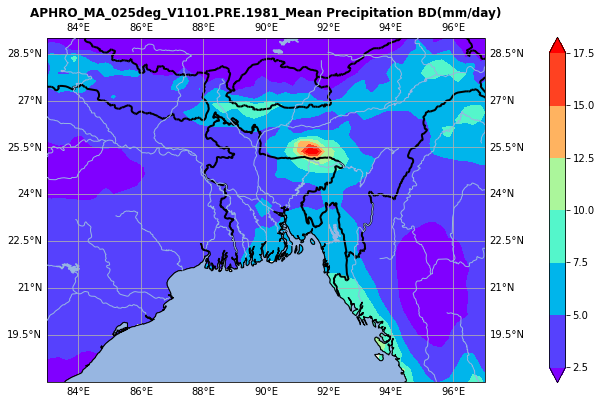

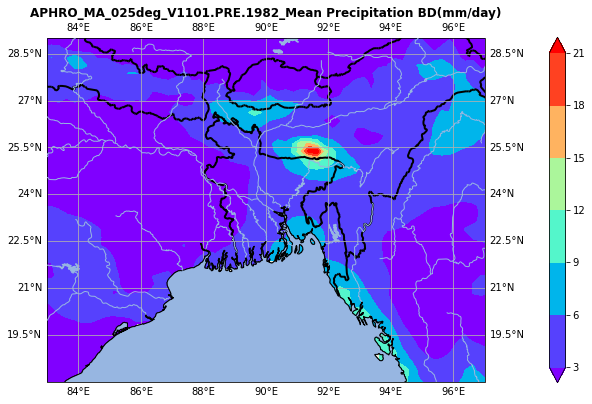

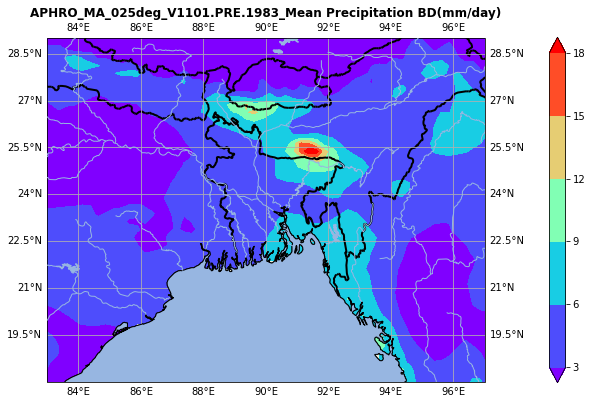

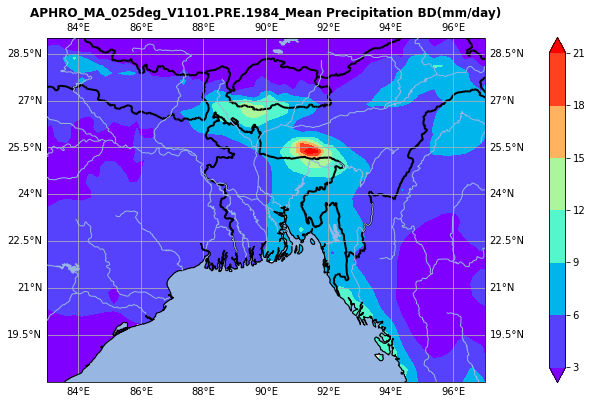

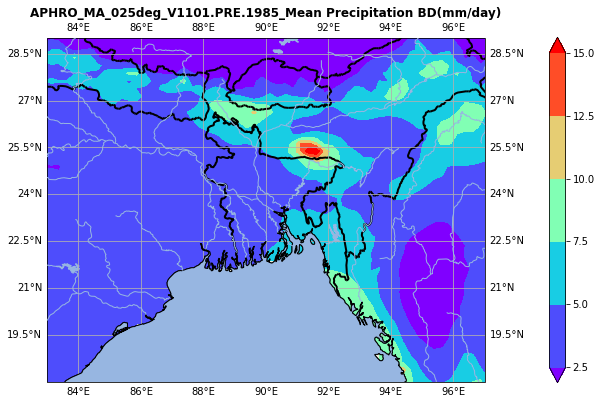

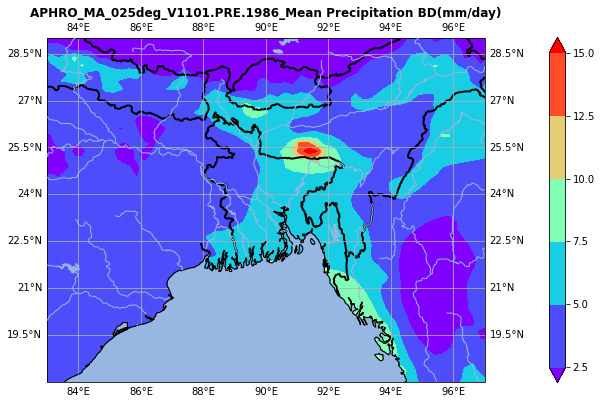

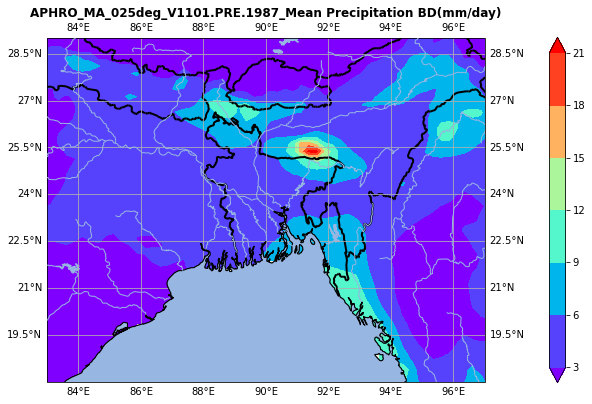

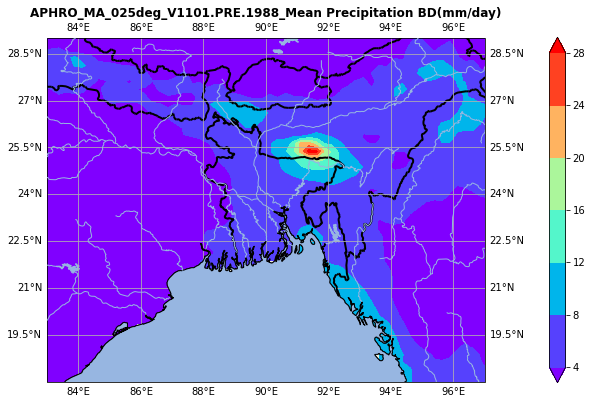

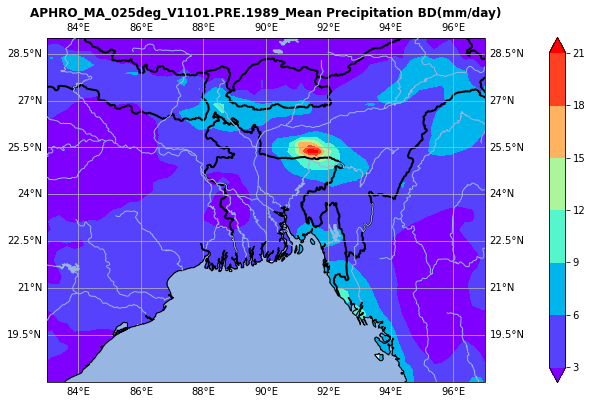

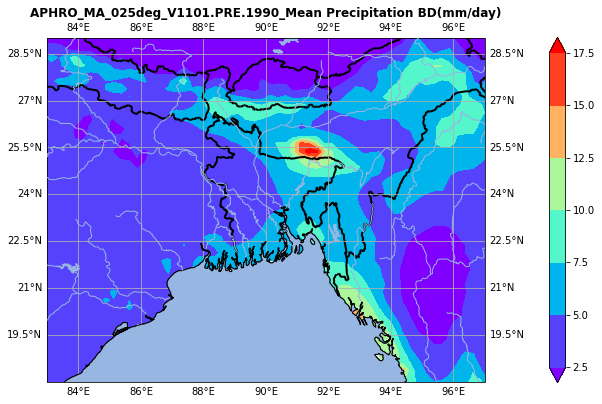

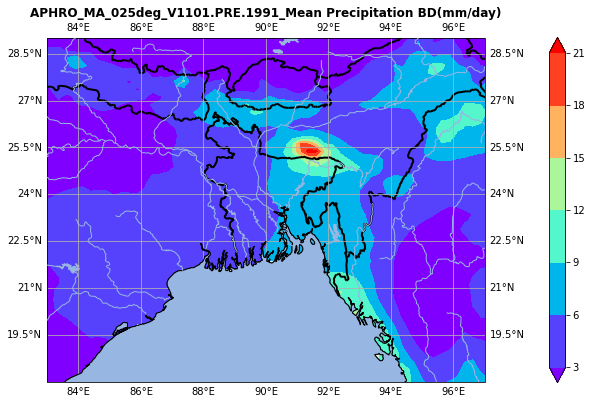

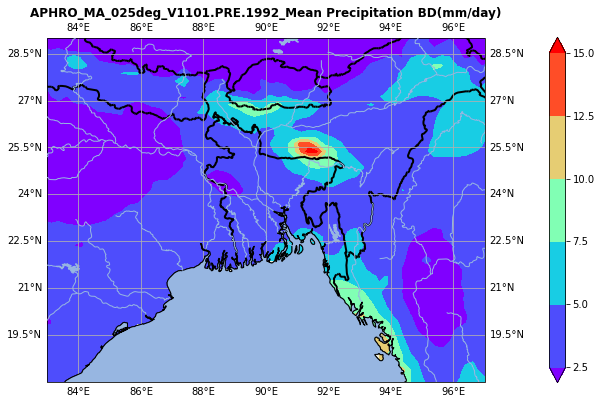

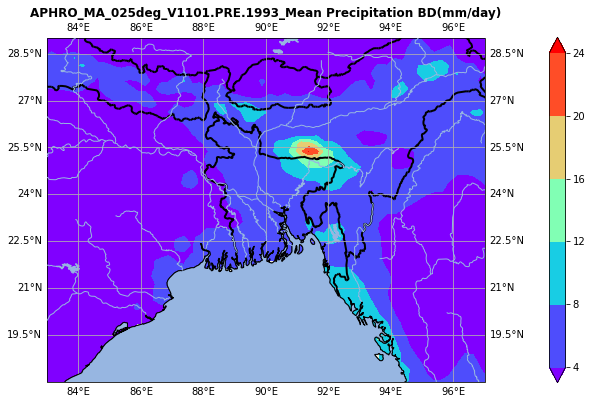

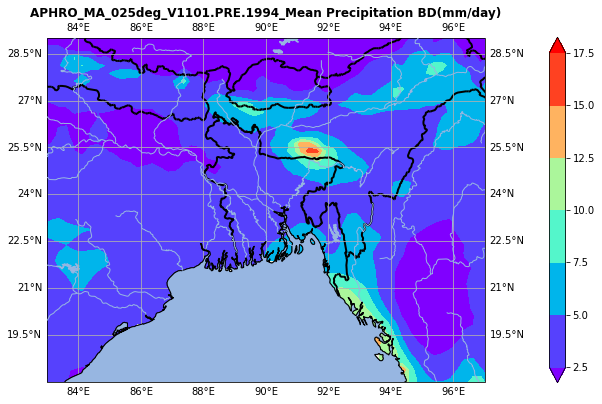

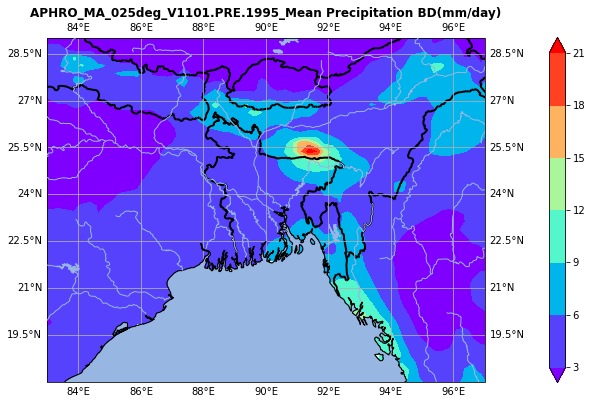

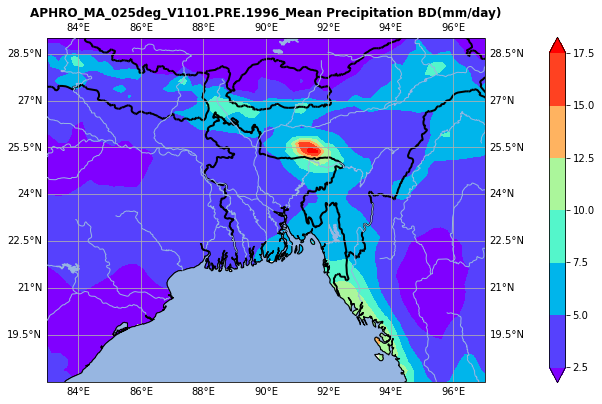

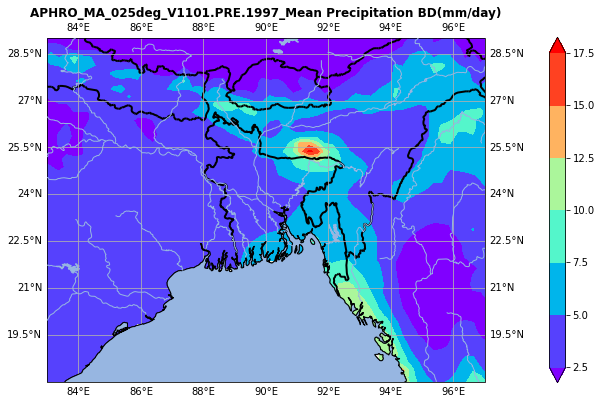

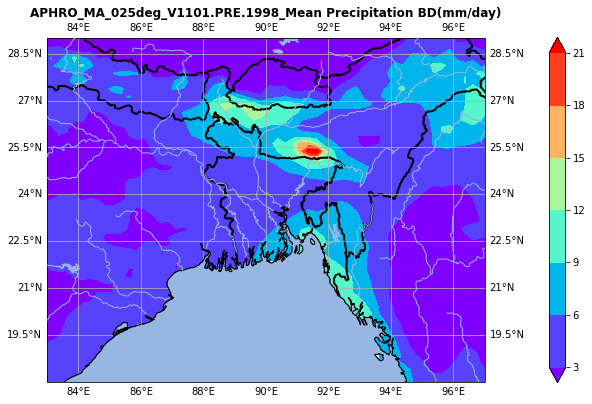

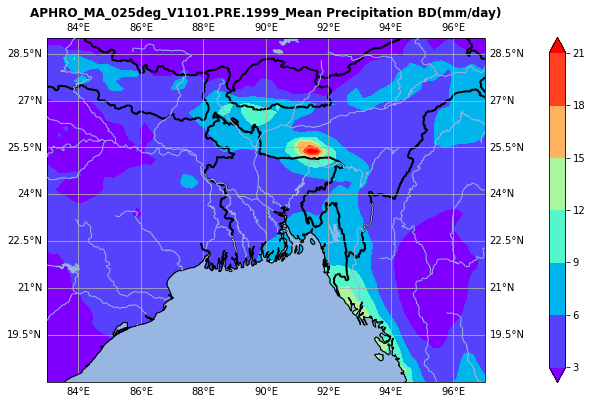

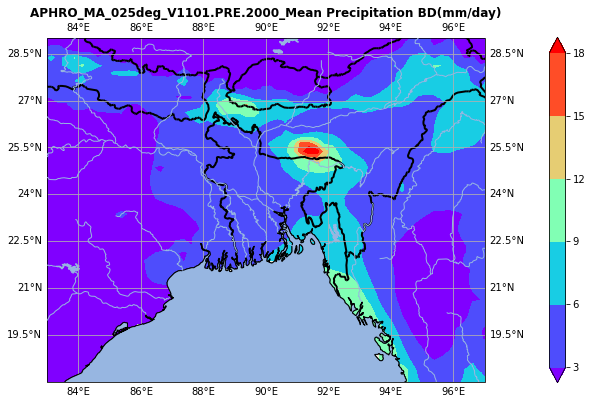

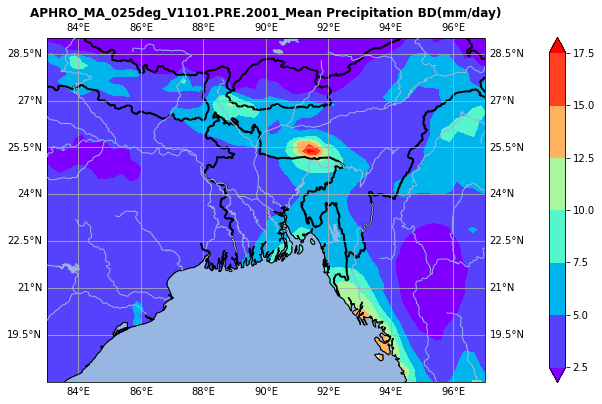

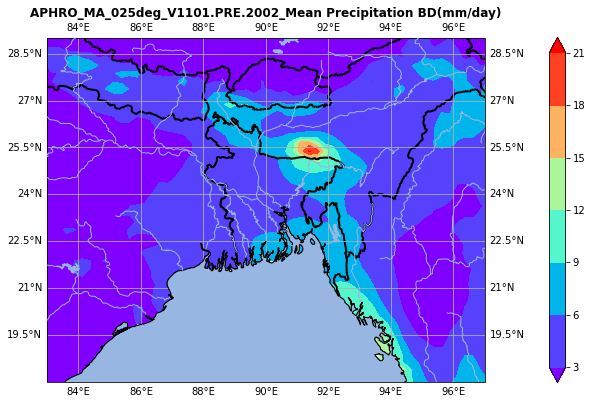

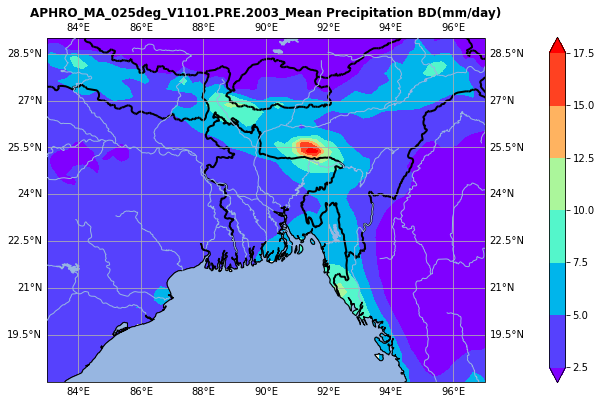

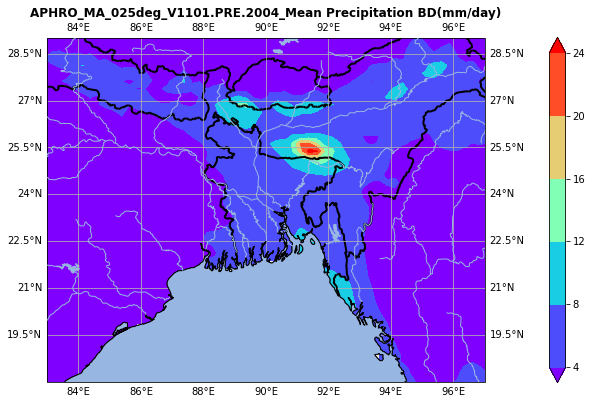

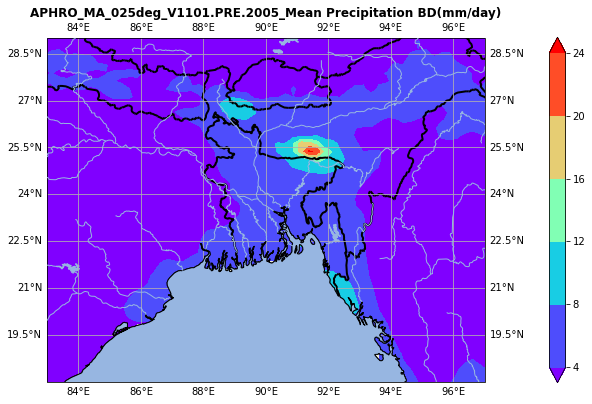

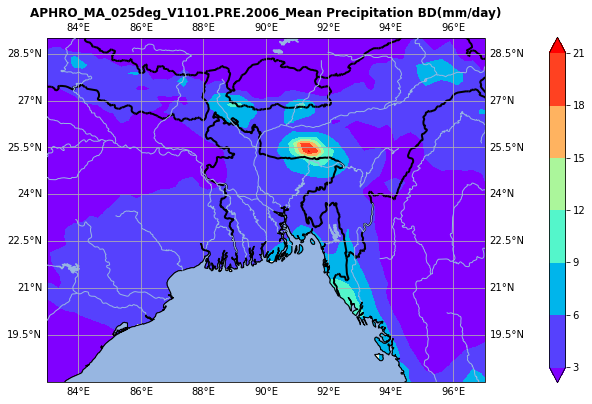

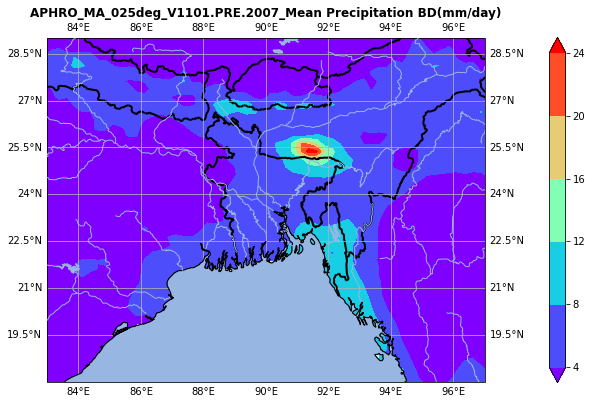

In [33]:
# path = '/media/tasanyphy/Documents/Project or Research work/Climate Change/climate_physics[omi_tuaha]/Tanvir_sir_data/all_data/'
for i in np.arange(1951,2008):
    i = str(i)
    new_file = 'APHRO_MA_025deg_V1101.PRE.'+i+'.nc'
    
    all_ds = xr.open_dataset(path+new_file)
    
    lon = all_ds['longitude'][:]
    lat = all_ds['latitude'][:] 
    time = all_ds['time'][:]
    
    lon2d, lat2d = np.meshgrid(lon, lat)
    
    all_ds_mean=all_ds.mean(dim='time')
    all_ds_mean['precip']
    
    
    
    fig = plt.figure(figsize=(9,6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    plt.contourf(lon2d, lat2d, all_ds_mean['precip'], cmap='rainbow', extend='both', transform = ccrs.PlateCarree())

    ax.coastlines()
    ax.add_feature(cf.BORDERS, linewidth=2)
    ax.add_feature(cf.OCEAN, zorder=100, edgecolor='k')
    ax.add_feature(cf.LAKES)
    ax.add_feature(cf.LAND)
    ax.add_feature(cf.RIVERS, zorder=100)

    plt.title('APHRO_MA_025deg_V1101.PRE.'+i+'_Mean Precipitation BD(mm/day)', 
              fontweight="bold")
    
    ax.set_extent([83, 97, 18, 29]) 
    ax.gridlines(draw_labels=True)


    #colorbar_setting
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    cax = plt.axes([0.9, 0.1, 0.025, 0.8]) #plt.axes([x_position,y_position,width,height])
    plt.colorbar(cax=cax)

    # if str(i):
    #   png_dir = '/content/drive/MyDrive/Climate Science Bangladesh /Climate_physics/Coding/Sany/'
    #   plt.savefig(png_dir+'APHRO_MA_025deg_V1101.PRE.'+str(n)+'_Mean Precipitation BD(mm/day).png',dpi=90)


    

In [ ]:
from IPython.display import HTML

In [ ]:
# fig = plt.figure(figsize=(9,6))
# ax = plt.axes(projection=ccrs.PlateCarree())
# def animate(i):
#        ax.clear()
#        # levels=np.arange(960,1001,5)
#        # cff=ax.contourf(data.lon, data.lat, np.reshape(data_psl,((30660, 43,25)))[s[i],:,:], levels=levels,cmap='YlOrRd_r', extend='both', transform = ccrs.PlateCarree())
#        cff=ax.contourf(lon2d, lat2d, all_ds_mean['precip'], cmap='rainbow', extend='both', transform = ccrs.PlateCarree())
#        #plt.colorbar(cff)
#        ax.coastlines()
#        ax.add_feature(cf.BORDERS)
#        ax.add_feature(cf.LAND)
#        plt.title(APHRO_MA_025deg_V1101.PRE.1951_to_test_Mean Precipitation BD(mm/day)) 
  
# ani = animation.FuncAnimation(fig,animate,len(s),interval=7.5*1e2,blit=False)

# HTML(ani.to_html5_video())

In [10]:
# for gif making: https://github.com/makerportal/gifly